# Results Analysis

In this script we are going to analyse the results of P2.

First we are going to visualize the statistics of our own recorded audio, named `audios.wav`. Using P1, we have calculated the statistics of this file, and save it in `audios.txt`.

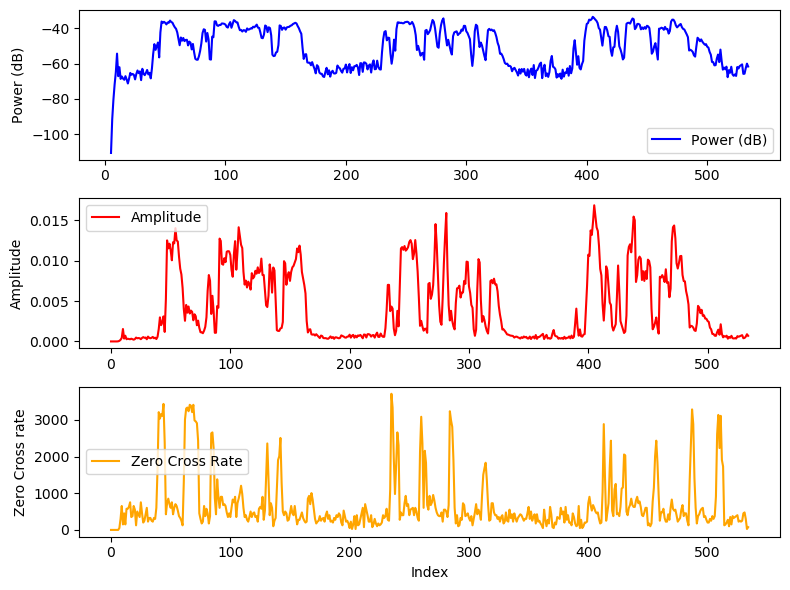

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('audios.txt')

power = data[:, 1]
amplitude = data[:, 2]
zcr = data[:, 3]

fig, axs = plt.subplots(3, 1, figsize=(8, 6))

axs[0].plot(power, color='b', label='Power (dB)')
axs[0].set_ylabel('Power (dB)')
axs[0].legend()

axs[1].plot(amplitude, color='r', label='Amplitude')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

axs[2].plot(zcr, color='orange', label='Zero Cross Rate')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Zero Cross rate')
axs[2].legend()

plt.tight_layout()
plt.show()

Now we are going to visualize the statistics of `audios_corrected.wav`, having used P1, as well, to calculate `audios_corrected.txt`.

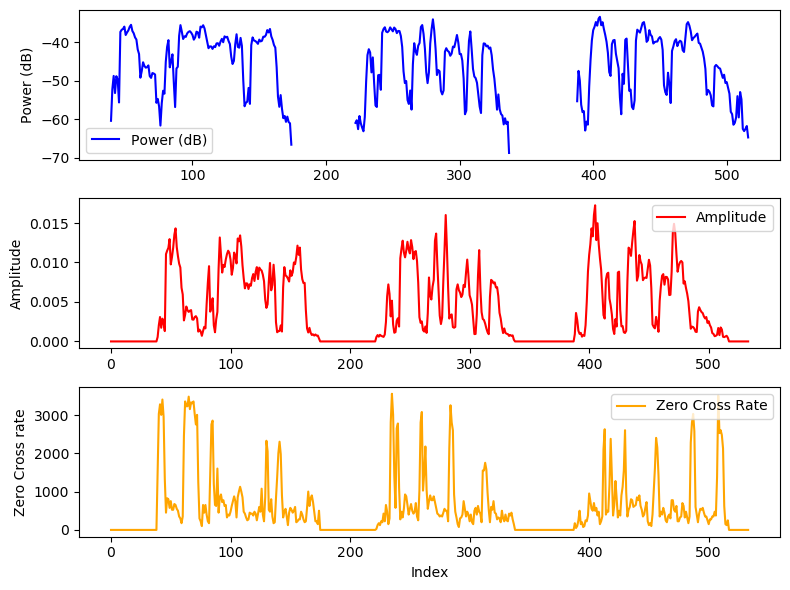

In [2]:
data = np.loadtxt('audios_corrected.txt')

power = data[:, 1]
amplitude = data[:, 2]
zcr = data[:, 3]

fig, axs = plt.subplots(3, 1, figsize=(8, 6))

axs[0].plot(power, color='b', label='Power (dB)')
axs[0].set_ylabel('Power (dB)')
axs[0].legend()

axs[1].plot(amplitude, color='r', label='Amplitude')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

axs[2].plot(zcr, color='orange', label='Zero Cross Rate')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Zero Cross rate')
axs[2].legend()

plt.tight_layout()
plt.show()

Here we are going to compare the power and amplitude of the two signals.

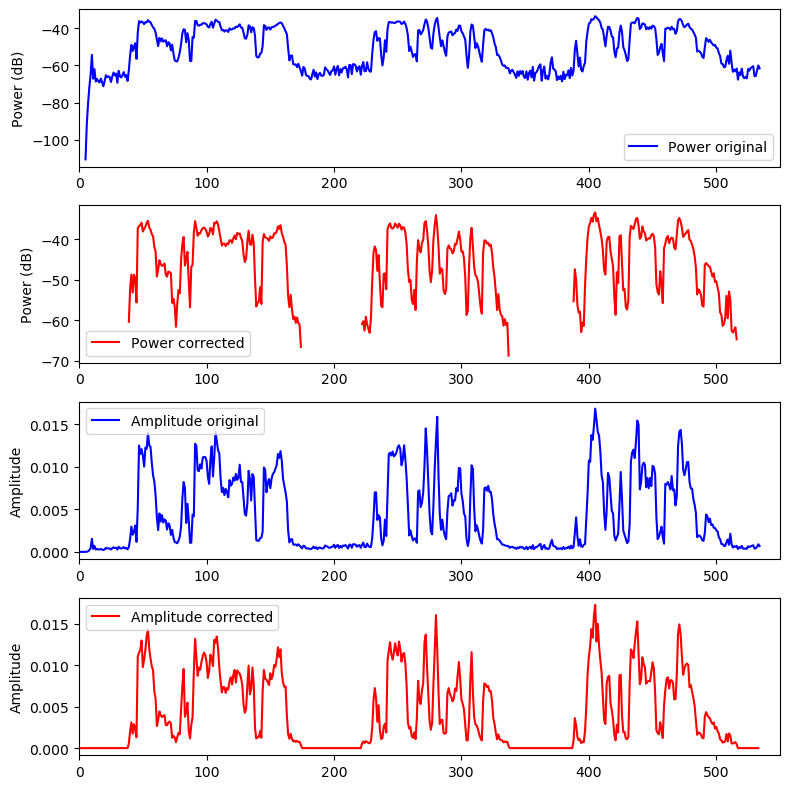

In [5]:
data1 = np.loadtxt('audios.txt')
power1 = data1[:, 1]
amplitude1 = data1[:, 2]
zcr1 = data1[:, 3]

data2 = np.loadtxt('audios_corrected.txt')
power2 = data2[:, 1]
amplitude2 = data2[:, 2]
zcr2 = data2[:, 3]

fig, axs = plt.subplots(4, 1, figsize=(8, 8))

axs[0].plot(power1, color='b', label='Power original')
axs[0].set_ylabel('Power (dB)')
axs[0].legend()

axs[1].plot(power2, color='r', label='Power corrected')
axs[1].set_ylabel('Power (dB)')
axs[1].legend()

axs[2].plot(amplitude1, color='b', label='Amplitude original')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

axs[3].plot(amplitude2, color='r', label='Amplitude corrected')
axs[3].set_ylabel('Amplitude')
axs[3].legend()

for ax in axs:
    ax.set_xlim(0, 550)
    

plt.tight_layout()
plt.show()

In this last cell we have wrote a code to visualize the error between the vad and lab file. In it we create two plots to visualize the labels made in the lab file, and the labels created in the vad program.

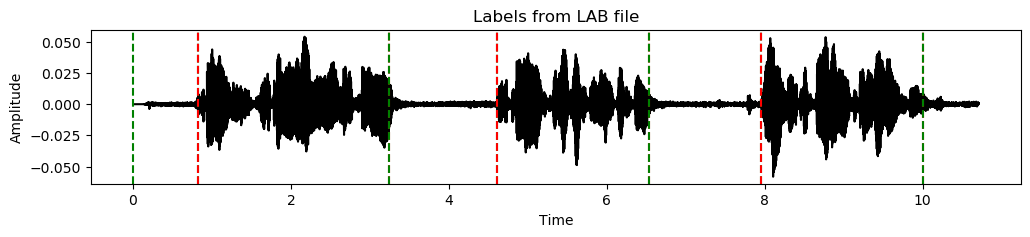

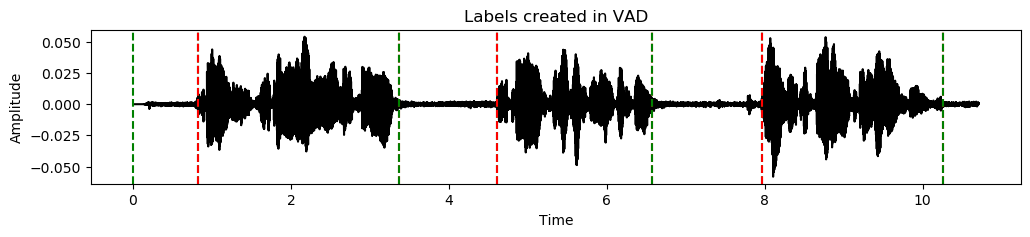

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

def read_txt_file(txt_file):
    data = []
    with open(txt_file, 'r') as file:
        for line in file:
            start, end, label = line.strip().split()
            data.append((float(start), float(end), label))
    return data

def plot_waveform(waveform, sample_rate, segments):
    time = np.arange(len(waveform)) / sample_rate
    plt.plot(time, waveform, color='black')

    ymin, ymax = plt.ylim()
    for i in range(len(segments) - 1):
        start, end, label = segments[i]
        next_start, _, next_label = segments[i + 1]

        color = 'r' if label == 'V' else 'g'  # Voice: red, Silence: green
        plt.axvline(x=start, color=color, linestyle='--')
        plt.axvline(x=next_start, color=color, linestyle='--')

    last_start, _, last_label = segments[-1]
    if last_label == 'V':
        plt.axvline(x=last_start, color='r', linestyle='--')
    else :
        plt.axvline(x=last_start, color='g', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

def read_wav_file(wav_file):
    waveform, sample_rate = sf.read(wav_file)
    return waveform, sample_rate

if __name__ == "__main__":
    wav_file = 'audios.wav'
    lab_file = 'audios.lab'
    vad_file = 'audios.vad'

    waveform, sample_rate = read_wav_file(wav_file)

    lab = read_txt_file(lab_file)
    vad = read_txt_file(vad_file)

    plt.figure(figsize=(12,2))
    plt.title('Labels from LAB file')
    plot_waveform(waveform, sample_rate, lab)
    
    plt.figure(figsize=(12, 2))
    plt.title('Labels created in VAD')
    plot_waveform(waveform, sample_rate, vad)


We can observe that the primary issue in our VAD program lies in the transition between voice and silence, it may be due to the hysteresis.